In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets
from skimage import feature
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# UTILITY FUNCTIONS

In [16]:
detector = MTCNN()

In [42]:
def face_detect(path):
    image_mtcnn = cv2.imread(path)
    faces = detector.detect_faces(image_mtcnn)
    for face in faces:
        box = face['box']
        conf = face['confidence']
        print("confidence: ", conf)
        x, y, w, h = box[0], box[1], box[2], box[3]


        cv2.putText(image_mtcnn, str(conf), (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), thickness=4)
        #cv2.rectangle(image_mtcnn, (x, y), (x+w, y+h) ,(0,0, 0), 0)
        face = image_mtcnn[y:y + h+20, x:x + w+20]
    return face

def increase_contrast(image, alpha, beta):
    # Apply contrast adjustment formula
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

def pre_test(test):
    frame2 = cv2.cvtColor(np.array(test), cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(frame2, (64,64))
    resized_frame= increase_contrast((resized_frame).astype('uint8'), 1.5, 10)
    img= resized_frame / 255
    return img


# LOAD MODEL (trained on enhansed ollivetti dataset)

In [18]:
import tensorflow.keras.backend as K
#L2 Distance Layer
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance
    between the embeddings
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, compare):
        sum_squared = K.sum(K.square(anchor - compare), axis=1, keepdims=True)
        return K.sqrt(K.maximum(sum_squared, K.epsilon()))

In [19]:
#this siamese model has been trained on enhansed ollivetti dataset
siamese_model_save = tf.keras.models.load_model('siamesemodel_ollivetti_contrast_150.keras', custom_objects={'DistanceLayer':DistanceLayer, 'binary_crossentropy':tf.losses.BinaryCrossentropy})

# TESTING ON DIFFERENT IMAGES

# PREDICT ON LFW Dataset

In [20]:
def face_detect(path):
    image_mtcnn = cv2.imread(path)
    faces = detector.detect_faces(image_mtcnn)
    for face in faces:
        box = face['box']
        conf = face['confidence']
        print("confidence: ", conf)
        x, y, w, h = box[0], box[1], box[2], box[3]


        cv2.putText(image_mtcnn, str(conf), (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), thickness=4)
        #cv2.rectangle(image_mtcnn, (x, y), (x+w, y+h) ,(0,0, 0), 0)
        face = image_mtcnn[y:y + h+20, x:x + w+20]
    return face

def face_detect_image(image):

    faces = detector.detect_faces(image)
    l=[]
    for face2 in faces:
        box = face2['box']
        conf = face2['confidence']
        print("confidence: ", conf)
        x, y, w, h = box[0], box[1], box[2], box[3]
        face2 = image[y:y + h, x:x + w+10]
   
        l.append(face2)

    return l,box


1/1 [==============================] - 0s 40ms/step
confidence:  0.9941918253898621


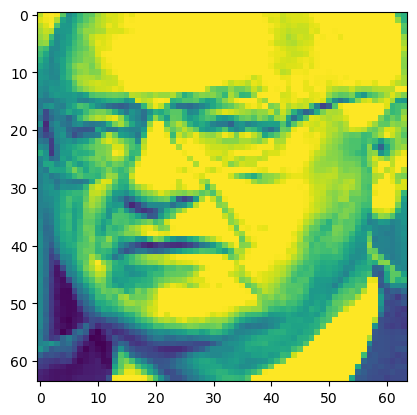

In [21]:
ref2="/Users/sachisingh/Library/CloudStorage/OneDrive-Personal/Desktop/major_project_8th/lfw/George_Ryan/George_Ryan_0002.jpg"
ref2=face_detect(ref2)
test1=pre_test(ref2)
plt.imshow(test1)

1/1 [==============================] - 0s 7ms/step
confidence:  0.9999619722366333


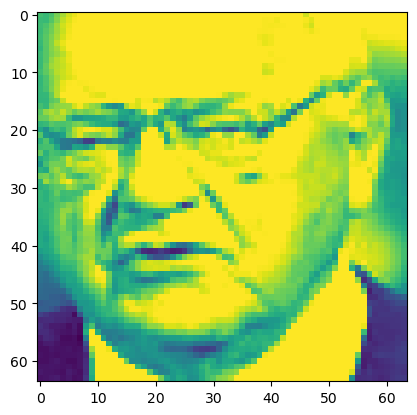

In [22]:
ref1="/Users/sachisingh/Library/CloudStorage/OneDrive-Personal/Desktop/major_project_8th/lfw/George_Ryan/George_Ryan_0003.jpg"
ref1=face_detect(ref1)
test2=pre_test(ref1)
plt.imshow(test2)

In [23]:
score = siamese_model_save.predict([np.expand_dims(test1,axis=0), np.expand_dims(test2,axis=0)])
print(score)

1/1 [==============================] - 0s 68ms/step
[[0.6996197]]


[[0.6996197]]


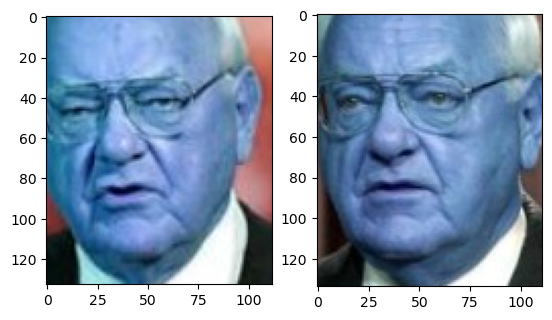

In [24]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(ref1)
axarr[1].imshow(ref2)
print(score)

1/1 [==============================] - 0s 8ms/step
confidence:  0.999901533126831


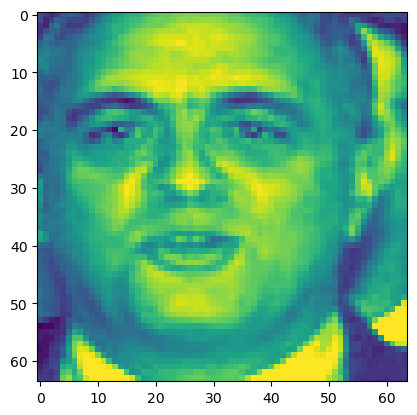

In [25]:
ref3="/Users/sachisingh/Library/CloudStorage/OneDrive-Personal/Desktop/major_project_8th/lfw/George_Tenet/George_Tenet_0001.jpg"
ref3=face_detect(ref3)
test3=pre_test(ref3)
plt.imshow(test3)

In [26]:
score = siamese_model_save.predict([np.expand_dims(test2,axis=0), np.expand_dims(test3,axis=0)])
print(score)

1/1 [==============================] - 0s 26ms/step
[[0.00926162]]


[[0.00926162]]


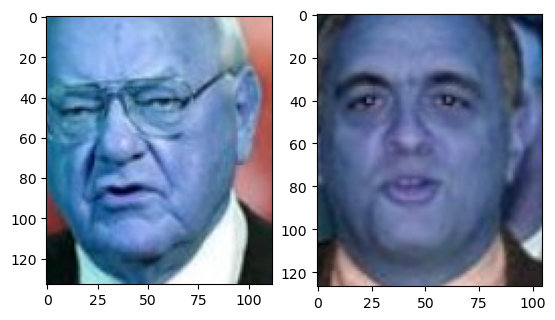

In [27]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(ref1)
axarr[1].imshow(ref3)
print(score)

# TESTING ON FACE SURVE

In [43]:

def pre_test2(test):
    frame2 =test
    resized_frame = cv2.resize(frame2, (64,64))
    resized_frame= increase_contrast((resized_frame).astype('uint8'), 1.5, 10)
    img= resized_frame / 255
    return img

IMAGE WITH IMAGE

1/1 [==============================] - 0s 8ms/step
confidence:  0.999998927116394


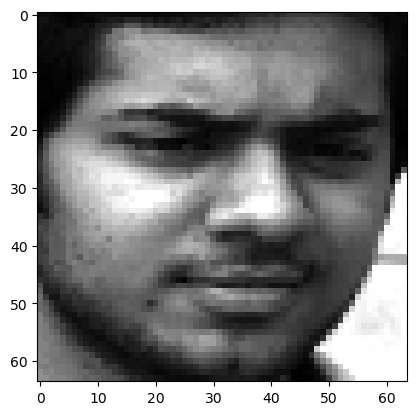

In [84]:
ref1="/Users/sachisingh/Library/CloudStorage/OneDrive-Personal/Desktop/major_project_8th/FaceSurv/D_S1_V8_84/D_S1_V8_84_171.jpg"
ref1=face_detect(ref1)
test1=pre_test(ref1)
plt.imshow(test1,cmap='gray')

1/1 [==============================] - 0s 8ms/step
confidence:  0.9999276399612427


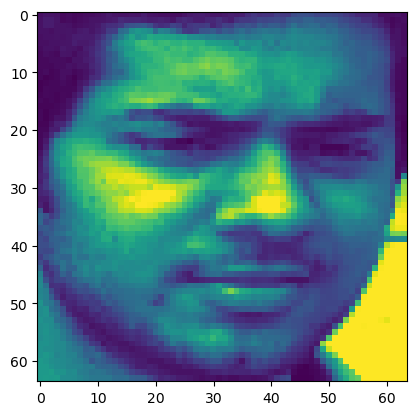

In [85]:
ref2="/Users/sachisingh/Library/CloudStorage/OneDrive-Personal/Desktop/major_project_8th/FaceSurv/D_S1_V8_84/D_S1_V8_84_172.jpg"
ref2=face_detect(ref2)
test2=pre_test(ref2)
plt.imshow(test2)

In [86]:
score = siamese_model_save.predict([np.expand_dims(test1,axis=0), np.expand_dims(test2,axis=0)])
print(score)

1/1 [==============================] - 0s 77ms/step
[[0.7207449]]


1/1 [==============================] - 0s 8ms/step
confidence:  0.999995231628418


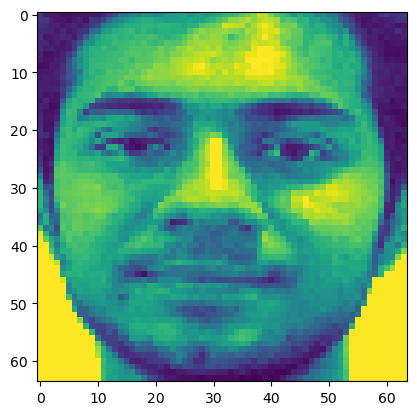

In [87]:
ref4="/Users/sachisingh/Downloads/main.png"
ref4=face_detect(ref4)
main=pre_test(ref4)
plt.imshow(main)

In [88]:
score = siamese_model_save.predict([np.expand_dims(main,axis=0), np.expand_dims(test2,axis=0)])
print(score)

1/1 [==============================] - 0s 38ms/step
[[0.605393]]


[[0.605393]]


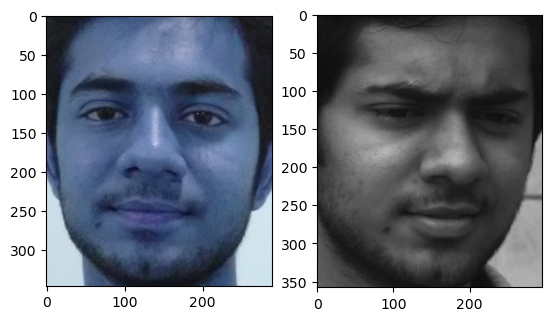

In [91]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(ref4)
axarr[1].imshow(ref1)
print(score)

In [93]:
score = siamese_model_save.predict([np.expand_dims(main,axis=0), np.expand_dims(test1,axis=0)])
print(score)

1/1 [==============================] - 0s 34ms/step
[[0.57179403]]


[[0.57179403]]


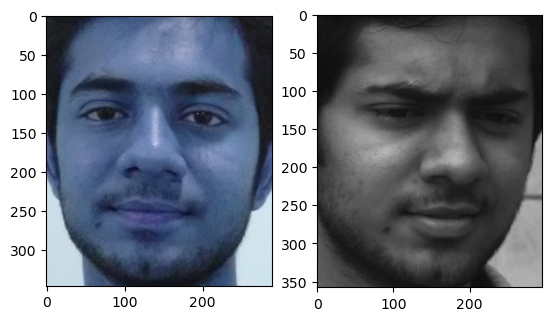

In [94]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(ref4)
axarr[1].imshow(ref1)
print(score)

# checking for negetive values

1/1 [==============================] - 0s 8ms/step
confidence:  0.999901533126831


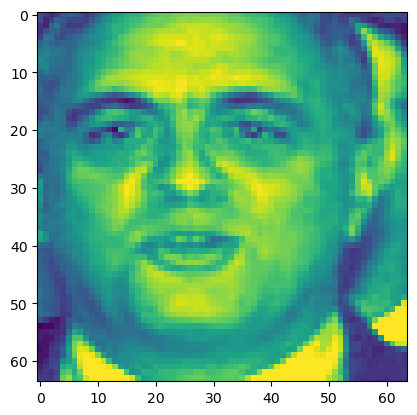

In [96]:
ref3="/Users/sachisingh/Library/CloudStorage/OneDrive-Personal/Desktop/major_project_8th/lfw/George_Tenet/George_Tenet_0001.jpg"
ref3=face_detect(ref3)
test3=pre_test(ref3)
plt.imshow(test3)

In [101]:
score = siamese_model_save.predict([np.expand_dims(test1,axis=0), np.expand_dims(test3,axis=0)])
print(score)

1/1 [==============================] - 0s 39ms/step
[[0.39835438]]


[[0.39835438]]


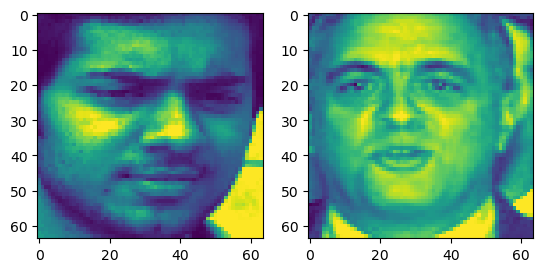

In [102]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(test1)
axarr[1].imshow(test3)
print(score)

As seen above the model outputs a similarity score above 0.5 for the same person and below 0.5 when the images are of different people,thus its working fine on a robust dataset